<h1 style="text-align: center;">Model Linear: Pendekatan Kuadrat Terkecil</h1>

# Standard import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

IPython.display.set_matplotlib_formats("svg")

# Pendahuluan

Diberikan pasangan data $(x,t)$ di mana $x$ adalah input dan $t$ adalah target, model linear dengan parameter $(w_0, w_1)$ dapat dinyatakan sebagai:

$$
t = f(x; w_0, w_1) = w_0 + w_1 x
$$

Untuk memilih model dengan parameter $(w_0, w_1)$ yang paling baik, kita perlu mendefisinikan seberapa baik model tersebut.
Beda kuadrat antara target dan keluaran dari model:
$$
\mathcal{L}_n = \left( t_n - f(x_n; w_0, w_1) \right)^2
$$

Untuk semua titik data:
$$
\mathcal{L} = \frac{1}{N} \sum_{n=1}^{N} \mathcal{L}_n
$$

$$
\arg\min_{w_{0},w_{1}} \frac{1}{N} \sum_{n=1}^{N} \mathcal{L}_{n}
$$

$$
\begin{align}
\mathcal{L} & = \frac{1}{N} \sum_{n=1}^{N} \left( t_n - (w_0 + w_1 x_{n}) \right)^2 \\
& = \frac{1}{N} \sum_{n=1}^{N} \left( w_1^2 x_n^2 + 2w_{1}x_{n}(w_0 - t_n) + w_0^2 - 2w_0 t_n + t_n^2 \right)
\end{align}
$$

$$
\frac{\partial\mathcal{L}}{\partial w_1} = 2w_1 \frac{1}{N} \left( \sum_{n=1}^{N} x_n^2 \right) +
\frac{2}{N} \left( \sum_{n=1}^{N} x_{n} (w_0 - t_n) \right)
$$

$$
\frac{\partial \mathcal{L}}{\partial w_0} = 2w_0 + 2w_1 \frac{1}{N} \left( \sum_{n=1}^{N} x_n \right) -
\frac{2}{N} \left( \sum_{n=1}^{N} t_n \right)
$$

# Menggunakan notasi matriks dan vektor

Dengan mendefinisikan input vektor
$$
\mathbf{x}_{n} = \begin{bmatrix}
1 \\
x_{n}
\end{bmatrix}
$$
dan parameter model
$$
\mathbf{w} = \begin{bmatrix}
w_{0} \\
w_{1}
\end{bmatrix}
$$
Model:
$$
f(x_n; w_0, w_1) = \mathbf{w}^{\mathsf{T}} \mathbf{x}_{n}
$$


Loss function:
$$
\mathcal{L} = \frac{1}{N} \sum_{n=1}^{N} \left( t_{n} - \mathbf{w}^{\mathsf{T}}
\mathbf{x}_{n} \right)^2
$$


$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}^{\mathsf{T}}_{1} \\
\mathbf{x}^{\mathsf{T}}_{2} \\
\vdots \\
\mathbf{x}^{\mathsf{T}}_{N}
\end{bmatrix} =
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
1 & x_{N} \\
\end{bmatrix}
$$

Vektor target:
$$
t = \begin{bmatrix}
t_1 \\
t_2 \\
\vdots \\
t_N
\end{bmatrix}
$$

$$
\mathcal{L} = \frac{1}{N} \left( \mathbf{t} - \mathbf{Xw} \right)^{\mathsf{T}}
\left( \mathbf{t} - \mathbf{Xw} \right)
$$

$$
\begin{align}
\mathcal{L} & = \frac{1}{N} \left(
\mathbf{t}^{\mathsf{T}} \mathbf{t} +
\left(\mathbf{Xw}\right)^{\mathsf{T}} \mathbf{Xw} - 
\mathbf{t}\mathbf{Xw} -
\left(\mathbf{Xw}\right)^{\mathsf{T}} \mathbf{t}
\right) \\
& = \frac{1}{N} \left(
\mathbf{w}^{\mathsf{T}} \mathbf{X}^{\mathsf{T}} \mathbf{X} \mathbf{w} -
2 \mathbf{w}^{\mathsf{T}} \mathbf{X}^{\mathsf{T}}\mathbf{t} +
\mathbf{t}^{\mathsf{T}} \mathbf{t}
\right)
\end{align}
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} =
\frac{2}{N} \left( \mathbf{X}^{\mathsf{T}} \mathbf{Xw} - \mathbf{X}^{\mathsf{T}}\mathbf{t} \right)
$$

$$
\begin{align}
\mathbf{X}^{\mathsf{T}} \mathbf{Xw} & = \mathbf{X}^{\mathsf{T}} \mathbf{t} \\
\mathbf{w} & = \left(\mathbf{X}^{\mathsf{T}}\mathbf{X} \right)^{-1} \mathbf{X}^{\mathsf{T}} \mathbf{t}
\end{align}
$$

$$
\begin{align}
w_{1} & = \frac{\overline{xt} - \overline{x}\overline{t}}{\overline{x^2} - \overline{x}^2} \\
w_{0} & = \overline{t} - w_{1} \overline{x}
\end{align}
$$

# Latihan: `olympic100m` data

In [1]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [10]:
import IPython
IPython.display.set_matplotlib_formats("svg")

In [5]:
data = np.loadtxt("../DATA/olympic100m.txt", delimiter=",")

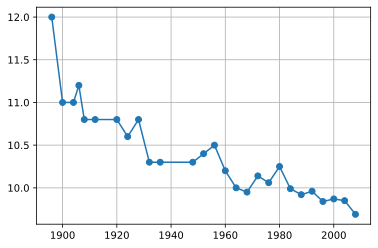

In [12]:
plt.clf()
plt.plot(data[:,0], data[:,1], marker="o")
plt.grid()

In [14]:
N = data.shape[0]

In [54]:
x = data[:,0]
t = data[:,1]

In [58]:
x_bar = np.mean(x)
t_bar = np.mean(t)
xt_bar = np.mean(x*t)
x2_bar = np.mean(x**2)

In [59]:
w1 = (xt_bar - x_bar*t_bar)/(x2_bar - x_bar**2)

In [60]:
w0 = t_bar - w1*x_bar

In [61]:
w0, w1

(36.41645590250286, -0.013330885710960602)

# Nonlinear

# Regularisasi

In [3]:
np.random.seed(1234)

In [78]:
x = np.linspace(0.0, 1.0, 6)
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [15]:
y = 2*x - 3
y

array([-3. , -2.6, -2.2, -1.8, -1.4, -1. ])

In [65]:
noisevar = 1.0
t = np.zeros( (len(x),1) ) # explicitly made t as column vector
t[:,0] = y + np.sqrt(noisevar)*np.random.randn(len(x))
t

array([[-1.94103081],
       [-2.99784023],
       [-1.86256235],
       [-0.75242143],
       [-0.35406174],
       [-0.13628271]])

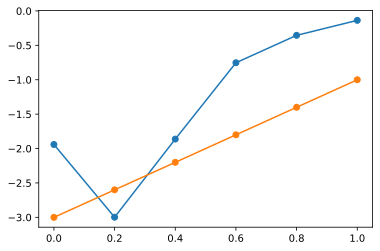

In [69]:
plt.plot(x, t, marker="o")
plt.plot(x, y, marker="o")

In [54]:
np.ones(len(x))

array([1., 1., 1., 1., 1., 1.])

In [31]:
NPolyMax = 5
X = np.zeros((len(x),NPolyMax+1))
X[:,0] = np.ones(len(x))
for i in range(1,NPolyMax+1):
    X[:,i] = x**i

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03,
        3.2000e-04],
       [1.0000e+00, 4.0000e-01, 1.6000e-01, 6.4000e-02, 2.5600e-02,
        1.0240e-02],
       [1.0000e+00, 6.0000e-01, 3.6000e-01, 2.1600e-01, 1.2960e-01,
        7.7760e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01,
        3.2768e-01],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [33]:
testx = np.linspace(0.0, 1.0, 101)
testX = np.zeros((len(testx),NPolyMax+1))
testX[:,0] = np.ones(len(testx))
for i in range(1,NPolyMax+1):
    testX[:,i] = testx**i

In [52]:
X.transpose() * X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.0000000e-02, 1.6000000e-02, 4.8000000e-03,
        1.2800000e-03, 3.2000000e-04],
       [0.0000000e+00, 1.6000000e-02, 2.5600000e-02, 2.3040000e-02,
        1.6384000e-02, 1.0240000e-02],
       [0.0000000e+00, 4.8000000e-03, 2.3040000e-02, 4.6656000e-02,
        6.6355200e-02, 7.7760000e-02],
       [0.0000000e+00, 1.2800000e-03, 1.6384000e-02, 6.6355200e-02,
        1.6777216e-01, 3.2768000e-01],
       [0.0000000e+00, 3.2000000e-04, 1.0240000e-02, 7.7760000e-02,
        3.2768000e-01, 1.0000000e+00]])

In [70]:
λ = 0.0

N = len(x)
XtXr = np.transpose(X) * X + N*λ*np.eye(X.shape[1])
XX = np.matmul( np.linalg.inv(XtXr), np.transpose(X) )
w = np.matmul( XX, t )

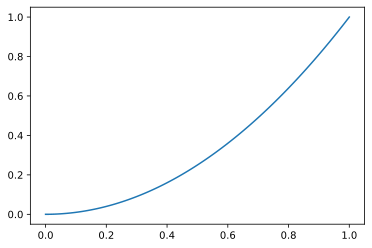

In [71]:
plt.plot(testx, testX[:,2])

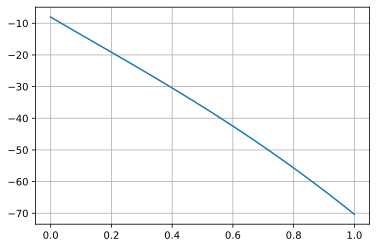

In [80]:
t_new = np.zeros(testx.shape)
for i,xi in enumerate(testX):
    t_new[i] = np.matmul( np.transpose(w), xi )

#plt.plot(x, t, marker="o", label="pred")
plt.plot(testx, t_new, label="data")
plt.grid()

In [ ]:
np.matrix(X)

In [38]:
w

array([ -12.60184971, -115.92624427,  -38.55804685,  -34.4649012 ,
          9.76705884,   -1.76333031])

In [62]:
w.transpose()

array([ -12.60184971, -115.92624427,  -38.55804685,  -34.4649012 ,
          9.76705884,   -1.76333031])

# Matriks dan vektor

In [53]:
X = np.zeros( (N,2) )

In [17]:
X[:,0] = np.ones(N)

In [19]:
X[:,1] = data[:,0]

In [21]:
t = np.zeros((N,1))

In [22]:
t[:,0] = data[:,1]

In [39]:
XtX = np.matmul( np.transpose(X), X )
XtXinv = np.linalg.inv( XtX )

In [40]:
w = np.matmul( np.matmul( XtXinv, np.transpose(X) ), t )

In [41]:
w

array([[ 3.64164559e+01],
       [-1.33308857e-02]])

In [42]:
np.matmul(np.transpose(w), X[2,:])

array([11.03444951])

In [46]:
t_new = np.zeros(t.shape)
for i,x in enumerate(X):
    t_new[i] = np.matmul( np.transpose(w), x )

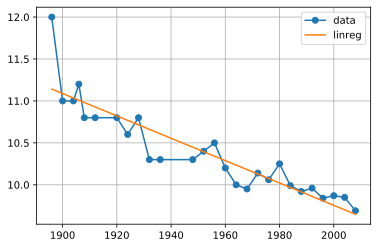

In [51]:
plt.clf()
plt.plot(X[:,1], t, marker="o", label="data")
plt.plot(X[:,1], t_new, label="linreg")
plt.grid()
plt.legend()

In [52]:
data

array([[1896.  ,   12.  ],
       [1900.  ,   11.  ],
       [1904.  ,   11.  ],
       [1906.  ,   11.2 ],
       [1908.  ,   10.8 ],
       [1912.  ,   10.8 ],
       [1920.  ,   10.8 ],
       [1924.  ,   10.6 ],
       [1928.  ,   10.8 ],
       [1932.  ,   10.3 ],
       [1936.  ,   10.3 ],
       [1948.  ,   10.3 ],
       [1952.  ,   10.4 ],
       [1956.  ,   10.5 ],
       [1960.  ,   10.2 ],
       [1964.  ,   10.  ],
       [1968.  ,    9.95],
       [1972.  ,   10.14],
       [1976.  ,   10.06],
       [1980.  ,   10.25],
       [1984.  ,    9.99],
       [1988.  ,    9.92],
       [1992.  ,    9.96],
       [1996.  ,    9.84],
       [2000.  ,    9.87],
       [2004.  ,    9.85],
       [2008.  ,    9.69]])